<h3 align='center'><b>TEAM ID - PTID-CDS-JAN-24-1772</b></h3>
<h5 align='center'><b>PROJECT ID - PRCP-1024-TexasSalaryPred</b></h5>

<h4><b>Business Case </b><h4>
<p style="font-size: 14px;">This database has salary information for positions at all 113 agencies in the Texas state
government. The Tribune obtained this data by requesting salary records from the state
comptroller, as allowed by the Texas Public Information Act.</p>

<h4><b>Problem Statement</b><h4>
<ul>
    <li><span style="font-size: 14px">Prepare a complete data analysis report on the given data..</span></li>
    <li><span style="font-size: 14px">Create a predictive model which will help theTexas state government
team to know the payroll information of employees of the state of Texas.</span></li>
    <li><span style="font-size: 14px">Who are the outliers in the salaries?</span></li>
    <li><span style="font-size: 14px">What departments/roles have the biggest wage disparities between
managers and employees?</span></li>
    <li><span style="font-size: 14px"> Have salaries and total compensations for some roles/ departments/
head-count changed over time?</span></li>
</ul>



In [1]:
## Basic Libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Import Dataset

data = pd.read_csv('./data/salary.csv')

In [3]:
# Display first 5 rows of data.

pd.set_option('display.max_columns', None)
data.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


In [4]:
# Dispaly Last 5 rows of data.

pd.set_option('display.max_columns', None)
data.tail()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,10/30/17,0.00,40.0,2899.00,34788.00,770781,NaN,NaN,NaN,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,07/13/15,0.00,40.0,5500.00,66000.00,847431,NaN,NaN,NaN,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,10/15/12,12.93,20.0,1120.60,13447.20,34266,NaN,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/22/89,0.00,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN
149480,809,STATE PRESERVATION BOARD ...,ZUNKER,GEORGIA,P,0130,CUSTOMER SERVICE REP I ...,WHITE,FEMALE,CRP - CLASSIFIED REGULAR PART-TIME,02/16/12,11.74,20.0,1017.46,12209.52,103583,NaN,NaN,NaN,NaN,NaN


<h4 style="margin-bottom: 20px"><b>Domain Analysis</b></h4>

| Specification | Description |
|---------------|:-----------:|
| AGENCY        | A business or organization providing a particular service on behalf of another business, person,or group.|
| AGENCY NAME   | A person or thing through which power is used or something is achieved.|
| LAST NAME     | The last name refers to the identification that an individual is given to represent the family name in the culture name of many societies.|
| FIRST NAME    | A personal name given to someone at birth or baptism and used before a family name.|
| MI            | Middle initial |
| CLASS CODE    | These codes must be established before employees can be added to the system and payrolls processed, since the files contain many of the defaults and codes used in these process.|
| CLASS TITLE   | Means the designation given under these rules to a class and to each position allocated to such class.|
| ETHNICITY     | The quality or fact of belonging to a population group or subgroup made up of people who share a common cultural background.|
| GENDER        | The term is also used more broadly to denote a range of identities that do not correspond to established ideas of male and female.|
| STATUS        | Pay status means an employee ’s right to receive compensation for time worked or leave taken, except when absent on leave-with- out-pay or suspension without pay.|
| EMPLOY DATE   | Date of joining of an individual. |
| HRLY RATE     | As an hourly employee, you should get paid for all of the hours that you work. If an employer wants more of your time, they’ll have to pay you more. |
| HRS PER WK    | The number of hours in a week that the employee normally would work for the shared work employer or 40 hours |
| MONTHLY       | A salary is the money that someone is paid each month by thei employer. |
| ANNUAL        | Annual salary is the amount of money your employer pays you over the course of a year in exchange for the work you perform. |
| STATE NUMBER  | A unique number assigned to a business or organization by the state. |
| DUPLICATED    | One of two or more identical things. |
| MULTIPLE FULL TIME JOBS | Individual works on one or more full time jobs |
| COMBINED MULTIPLE JOBS | The Combine Jobs feature allows you to merge two or more jobs from the same market view into a single job. |
| SUMMED ANNUAL SALARY | Total salary earned by an individual in a year including multiple full time jobs and combined multiple jobs. |
| HIDE FROM SEARCH | Gives you the option for your searches to be hidden with respect to organization. |

<h4><b>Basic Checks</b></h4>

In [5]:
# Total No.of Rows and Columns in dataset

rows, col = data.shape
print ("Dimensions of dataset: {}" . format (data.shape))
print ('Rows:', rows, '\nColumns:', col)

Dimensions of dataset: (149481, 21)
Rows: 149481 
Columns: 21


In [6]:
# Columns in dataset

columns = data.columns
for i in range(len(columns)):
    print(f'Column {i}: {columns[i]}')

Column 0: AGENCY
Column 1: AGENCY NAME
Column 2: LAST NAME
Column 3: FIRST NAME
Column 4: MI
Column 5: CLASS CODE
Column 6: CLASS TITLE
Column 7: ETHNICITY
Column 8: GENDER
Column 9: STATUS
Column 10: EMPLOY DATE
Column 11: HRLY RATE
Column 12: HRS PER WK
Column 13: MONTHLY
Column 14: ANNUAL
Column 15: STATE NUMBER
Column 16: duplicated
Column 17: multiple_full_time_jobs
Column 18: combined_multiple_jobs
Column 19: summed_annual_salary
Column 20: hide_from_search


In [7]:
# Information about Columns in dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS CODE               149481 non-null  object 
 6   CLASS TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY DATE              149481 non-null  object 
 11  HRLY RATE                149481 non-null  float64
 12  HRS PER WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

<h4><b>Insights</b></h4>
<p style="font-size: 14px">
    Form the above information we can see there are 
    <ul>
        <li style="font-size: 14px"><b>4 </b>Null values</li>
        <li style="font-size: 14px"><b>2 </b>Integer columns and</li>
        <li style="font-size: 14px"><b>6 </b>Float columns</li>
        <li style="font-size: 14px"><b>6 </b>Object columns</li>
    </ul>
<p>

In [8]:
# Statistical analysis of the dataset

data.describe()

,AGENCY,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,multiple_full_time_jobs,summed_annual_salary
count,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,1.494810e+05,14.0,16.000000
mean,545.736288,0.346488,39.714918,4226.184248,50714.210973,5.651930e+05,1.0,74303.955000
std,139.057691,4.211485,2.323855,2093.111691,25117.340292,4.786212e+05,0.0,51925.944282
min,101.000000,0.000000,1.000000,50.000000,600.000000,1.000000e+00,1.0,18000.000000
25%,529.000000,0.000000,40.000000,3019.840000,36238.080000,1.133340e+05,1.0,32962.500000
50%,530.000000,0.000000,40.000000,3720.170000,44642.040000,3.463730e+05,1.0,48063.300000
75%,696.000000,0.000000,40.000000,4865.810000,58389.720000,1.100500e+06,1.0,123751.770000
max,930.000000,117.788480,70.000000,46125.000000,553500.000000,1.271604e+06,1.0,171383.400000


<h4 style="margin-bottom: 0px"><b>Insights</b></h4>
<p style="font-size: 14px">
    From the statistical analysis provided by <code>data.describe()</code>, we can observe:
    <ul style="font-size: 14px">
        <li>The dataset contains <b>149481</b> entries.</li>
        <li>The <b>mean</b> hourly rate is approximately <b>0.35</b>, indicating the average hourly pay across all agencies.</li>
        <li>Employees work an average of <b>39.71</b> hours per week.</li>
        <li>The <b>mean</b> monthly salary is around <b>4226.1</b>, which gives an insight into the general salary distribution.</li>
        <li>The <b>mean</b> annual salary is approximately <b>74303.95</b>, with a standard deviation of <b>51925.94</b>, indicating a wide range of salaries.</li>
        <li>The <b>minimum</b> summed annual salary in the dataset is <b>18000.00</b>, and the <b>maximum</b> is <b>171383.40</b>, showcasing the disparity in earnings among different roles.</li>
    </ul>
</p>

In [9]:
data.describe(include='O').T

,count,unique,top,freq
AGENCY NAME,149481,113,HEALTH AND HUMAN SERVICES COMMISSION ...,36667
LAST NAME,149481,38675,SMITH,1243
FIRST NAME,149481,23559,MICHAEL,1843
MI,149481,27,,38408
CLASS CODE,149481,1481,4504,9267
CLASS TITLE,149481,1422,CORREC OFFICER IV ...,9267
ETHNICITY,149481,6,WHITE,67142
GENDER,149481,2,FEMALE,85328
STATUS,149481,11,CRF - CLASSIFIED REGULAR FULL-TIME,142502
EMPLOY DATE,149481,6295,09/01/17,12359


<h4 style="margin-bottom: 0px"><b>Insights</b></h4>
<p style="font-size: 14px">
    From the output of <code>data.describe(include='o')</code>, we can derive several insights:
    <ul style="font-size: 14px">
        <li>The <b>AGENCY</b> column, representing different agencies, has a mean value of approximately <b>545.74</b>, suggesting a wide distribution of employees across various agencies.</li>
        <li>The <b>mean hourly rate</b> is <b>0.35</b>, which might indicate that most of the dataset contains salaried employees rather than hourly ones, or the hourly rate is not the primary compensation method for most employees.</li>
        <li>On average, employees work <b>39.71 hours per week</b>, which is close to the standard full-time work schedule of 40 hours per week.</li>
        <li>The <b>mean monthly salary</b> is approximately <b>4226.1</b>, indicating the average monthly earnings among the employees.</li>
        <li>The <b>mean annual salary</b> stands at about <b>74303.95</b>, with a significant standard deviation of <b>51925.94</b>, highlighting a substantial variance in annual salaries among employees. This variance could be due to differences in roles, departments, or seniority levels.</li>
        <li>The dataset's <b>minimum</b> and <b>maximum summed annual salaries</b> are <b>18000.00</b> and <b>171383.40</b> respectively, showcasing a broad range of total compensation across different positions and departments.</li>
        <li>There are <b>38,675</b> unique <b>LAST NAME</b> entries and <b>23,559</b> unique <b>FIRST NAME</b> entries, reflecting a wide diversity among the employees.</li>
        <li>The <b>MI</b> (Middle Initial) column, despite being optional, still contains a significant number of unique entries, showcasing the dataset's detail in capturing employee names.</li>
        <li>Columns like <b>GENDER</b>, <b>STATUS</b>, <b>EMPLOY DATE</b>, <b>duplicated</b>, <b>combined_multiple_jobs</b>, and <b>hide_from_search</b> provide insights into the workforce's composition, employment status, and data privacy considerations.</li>
        <li>The presence of unique values in <b>duplicated</b>, <b>combined_multiple_jobs</b>, and <b>hide_from_search</b> columns, although minimal, indicates specific cases within the dataset that may require further investigation or special handling.</li>
    </ul>
</p>

In [10]:
# Check for missing values in datasets.

data.isnull().sum()

AGENCY                          0
AGENCY NAME                     0
LAST NAME                       0
FIRST NAME                      0
MI                              0
CLASS CODE                      0
CLASS TITLE                     0
ETHNICITY                       0
GENDER                          0
STATUS                          0
EMPLOY DATE                     0
HRLY RATE                       0
HRS PER WK                      0
MONTHLY                         0
ANNUAL                          0
STATE NUMBER                    0
duplicated                 149338
multiple_full_time_jobs    149467
combined_multiple_jobs     149384
summed_annual_salary       149465
hide_from_search           149465
dtype: int64

<h4 style="margin-bottom: 0px"><b>Insights</b></h4>
<p style="font-size: 14px">
    Form the above Null value analysis we can find there are
    <div style="display: flex; align-items: center;">
        <ul style="font-size: 14px">
            <li>We can see that there are <b>5</b> columns with <b>Null</b> values</li>
        </ul>
    </div>
    <b style="font-size: 14px">- duplicated, <br/>
    - multiple_full_time_jobs, <br/> 
    - combined_multiple_jobs, <br/>
    - summed_annual_salary, <br/>
    - hide_from_search <br/>
    are the columns that contains Null values.</b>
</p>

In [11]:
# check for duplicates in datasets.

print(f'The Number of duplicates in the given dataset is {data.duplicated().sum()}')

The Number of duplicates in the given dataset is 0


<h4 style="margin-bottom: 0px;"><b>Insights</b></h4>
<p style="font-size: 14px;">
    <ul>
        <li style="font-size: 14px;">The above check implies that there are no duplicate values</li>
    </ul>
</p>

In [12]:
# no of unique elements in each columns

data.nunique().to_frame().T

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,113,113,38675,23559,27,1481,1422,6,2,11,6295,206,58,40552,40554,149465,1,1,1,15,1


<h4 style="margin-bottom: 0px;"><b>Insights</b></h4>
<p style="font-size: 14px;">
    The output from <code>data.nunique().to_frame().T</code> provides a concise overview of the uniqueness within the dataset:
    <ul style="font-size: 14px;">
        <li>There are <b>113</b> unique agencies and agency names, indicating a wide variety of departments within the Texas state government.</li>
        <li>The dataset contains a rich diversity of names with <b>38,675</b> unique last names and <b>23,559</b> unique first names.</li>
        <li>There are <b>1,481</b> unique class codes and <b>1,422</b> class titles, showcasing the broad range of job classifications.</li>
        <li>Unique values in columns like <b>multiple_full_time_jobs</b>, <b>combined_multiple_jobs</b>, <b>summed_annual_salary</b>, and <b>hide_from_search</b> are very limited, indicating sparse data or specific conditions that rarely occur.</li>
    </ul>
</p>

In [13]:
pd.set_option('display.max_rows', None)
data['AGENCY NAME'].value_counts(normalize=True)

AGENCY NAME
HEALTH AND HUMAN SERVICES COMMISSION                  0.245295
TEXAS DEPARTMENT OF CRIMINAL JUSTICE                  0.240338
TEXAS DEPARTMENT OF TRANSPORTATION                    0.087630
DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES          0.084211
DEPARTMENT OF PUBLIC SAFETY                           0.067547
TEXAS WORKFORCE COMMISSION                            0.031128
OFFICE OF THE ATTORNEY GENERAL                        0.027703
DEPARTMENT OF STATE HEALTH SERVICES                   0.020932
PARKS AND WILDLIFE DEPARTMENT                         0.020471
COMPTROLLER OF PUBLIC ACCOUNTS                        0.018384
TEXAS COMMISSION ON ENVIRONMENTAL QUALITY             0.018016
TEXAS JUVENILE JUSTICE DEPARTMENT                     0.013748
TEXAS DEPARTMENT OF INSURANCE                         0.008550
COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECTION     0.006911
TEXAS EDUCATION AGENCY                                0.006469
RAILROAD COMMISSION                        

In [14]:
data.ETHNICITY.value_counts(normalize=True)

ETHNICITY
WHITE              0.449167
HISPANIC           0.271506
BLACK              0.239850
ASIAN              0.028552
OTHER              0.006161
AM INDIAN          0.004763
Name: proportion, dtype: float64

<h4 style="margin-bottom: 0px;"><b>Insights</b></h4>
<p style="font-size: 14px;">
    The output of <code>data.ETHNICITY.value_counts(normalize=True)</code> provides a proportional breakdown of the ethnicities represented in the dataset:
    <ul style="font-size: 14px;">
        <li><b>WHITE</b> individuals constitute approximately <b>44.92%</b> of the dataset, making them the largest ethnic group represented.</li>
        <li><b>HISPANIC</b> individuals are the second largest group, representing about <b>27.15%</b> of the dataset.</li>
        <li><b>BLACK</b> individuals account for roughly <b>23.99%</b>, indicating significant representation within the dataset.</li>
        <li><b>ASIAN</b> individuals make up about <b>2.86%</b> of the dataset, a smaller proportion compared to the other groups.</li>
        <li>Individuals identified as <b>OTHER</b> and <b>AM INDIAN</b> (American Indian) represent <b>0.62%</b> and <b>0.48%</b> respectively, indicating the least representation among the categories provided.</li>
    </ul>
    <span style="font-size: 14px;">These proportions highlight the ethnic diversity within the Texas state government's workforce, as captured in the dataset.</span>
</p>

In [15]:
data.GENDER.value_counts(normalize=True)

GENDER
FEMALE             0.570828
MALE               0.429172
Name: proportion, dtype: float64

<h4 style="margin-bottom: 0px;"><b>Insights</b></h4>
<p style="font-size: 14px;">
    The output of <code>data.GENDER.value_counts(normalize=True)</code> provides a breakdown of the gender distribution within the dataset:
    <ul style="font-size: 14px;">
        <li><b>FEMALE</b> individuals represent approximately <b>57.08%</b> of the dataset, making them the majority gender.</li>
        <li><b>MALE</b> individuals account for about <b>42.92%</b> of the dataset, indicating a higher representation of females in the Texas state government workforce as captured in this dataset.</li>
    </ul>
    <span style="font-size: 14px;">This gender distribution offers insights into the composition of the workforce, potentially reflecting the diversity and inclusion policies or hiring practices within the Texas state government.</span>
</p>

In [16]:
data.STATUS.value_counts(normalize=True)

STATUS
CRF - CLASSIFIED REGULAR FULL-TIME          0.953312
URF - UNCLASSIFIED REGULAR FULL-TIME        0.015808
CRP - CLASSIFIED REGULAR PART-TIME          0.010242
CTF - CLASSIFIED TEMPORARY FULL-TIME        0.007332
URP - UNCLASSIFIED REGULAR PART-TIME        0.006355
ERF - EXEMPT REGULAR FULL-TIME              0.006175
CTP - CLASSIFIED TEMPORARY PART-TIME        0.000542
UTP - UNCLASSIFIED TEMPORARY PART-TIME      0.000140
UTF - UNCLASSIFIED TEMPORARY FULL-TIME      0.000080
ERP - EXEMPT REGULAR PART-TIME              0.000007
CTP - CLASSIFIED TEMPORARY FULL-TIME        0.000007
Name: proportion, dtype: float64

<h4 style="margin-bottom: 0px;"><b>Insights</b></h4>
<p style="font-size: 14px;">
    The output of <code>data.STATUS.value_counts(normalize=True)</code> provides a breakdown of the employment status distribution within the dataset:
    <ul style="font-size: 14px;">
        <li>The majority of employees are classified as <b>CRF - CLASSIFIED REGULAR FULL-TIME</b>, representing approximately <b>95.33%</b> of the dataset. This indicates that most employees have stable, full-time positions.</li>
        <li><b>URF - UNCLASSIFIED REGULAR FULL-TIME</b> employees make up about <b>1.58%</b> of the dataset, suggesting a smaller proportion of employees are in unclassified full-time roles.</li>
        <li><b>CRP - CLASSIFIED REGULAR PART-TIME</b> and other part-time classifications represent a minor portion of the workforce, highlighting the predominance of full-time employment within the Texas state government.</li>
    </ul>
    <span style="font-size: 14px">This distribution underscores the employment structure within the Texas state government, with a strong emphasis on full-time classified positions.</span>
</p>



<h4><b>EXPLORATORY DATA ANALYSIS</b></h4>

In [17]:
# Rename the column in the data
data.rename({'AGENCY NAME': 'AGENCY_NAME', 'CLASS CODE': 'CLASS_CODE','CLASS TITLE':'CLASS_TITLE','EMPLOY DATE':'EMPLOY_DATE','HRLY RATE':'HRLY_RATE','HRS PER WK':'HRS_PER_WK','STATE NUMBER':'STATE_NUMBER', 'LAST NAME': 'LAST_NAME', 'FIRST NAME': 'FIRST_NAME'}, axis=1,inplace=True)
data.columns

Index(['AGENCY', 'AGENCY_NAME', 'LAST_NAME', 'FIRST_NAME', 'MI', 'CLASS_CODE',
       'CLASS_TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY_DATE',
       'HRLY_RATE', 'HRS_PER_WK', 'MONTHLY', 'ANNUAL', 'STATE_NUMBER',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

In [18]:
categorical_columns = []
continuous_columns = []

for col in data.columns:
    if data[col].dtype == 'object':
        categorical_columns.append(col)
    else:
        continuous_columns.append(col)
        
print('Categorical Columns: \n', categorical_columns)
print('\n')
print('Continuous Columns: \n', continuous_columns)

Categorical Columns: 
 ['AGENCY_NAME', 'LAST_NAME', 'FIRST_NAME', 'MI', 'CLASS_CODE', 'CLASS_TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY_DATE', 'duplicated', 'combined_multiple_jobs', 'hide_from_search']


Continuous Columns: 
 ['AGENCY', 'HRLY_RATE', 'HRS_PER_WK', 'MONTHLY', 'ANNUAL', 'STATE_NUMBER', 'multiple_full_time_jobs', 'summed_annual_salary']


<h4><b>Univariate Analysis</b></h4>

In [19]:
# Remove the ANNUAL column from the continuous columns since its a target/output variable/column.
continuous_columns.remove('ANNUAL')
print(continuous_columns)

['AGENCY', 'HRLY_RATE', 'HRS_PER_WK', 'MONTHLY', 'STATE_NUMBER', 'multiple_full_time_jobs', 'summed_annual_salary']


<h4 style="font-size: 14px"><b>Analysis for Continuous Columns</b></h4>

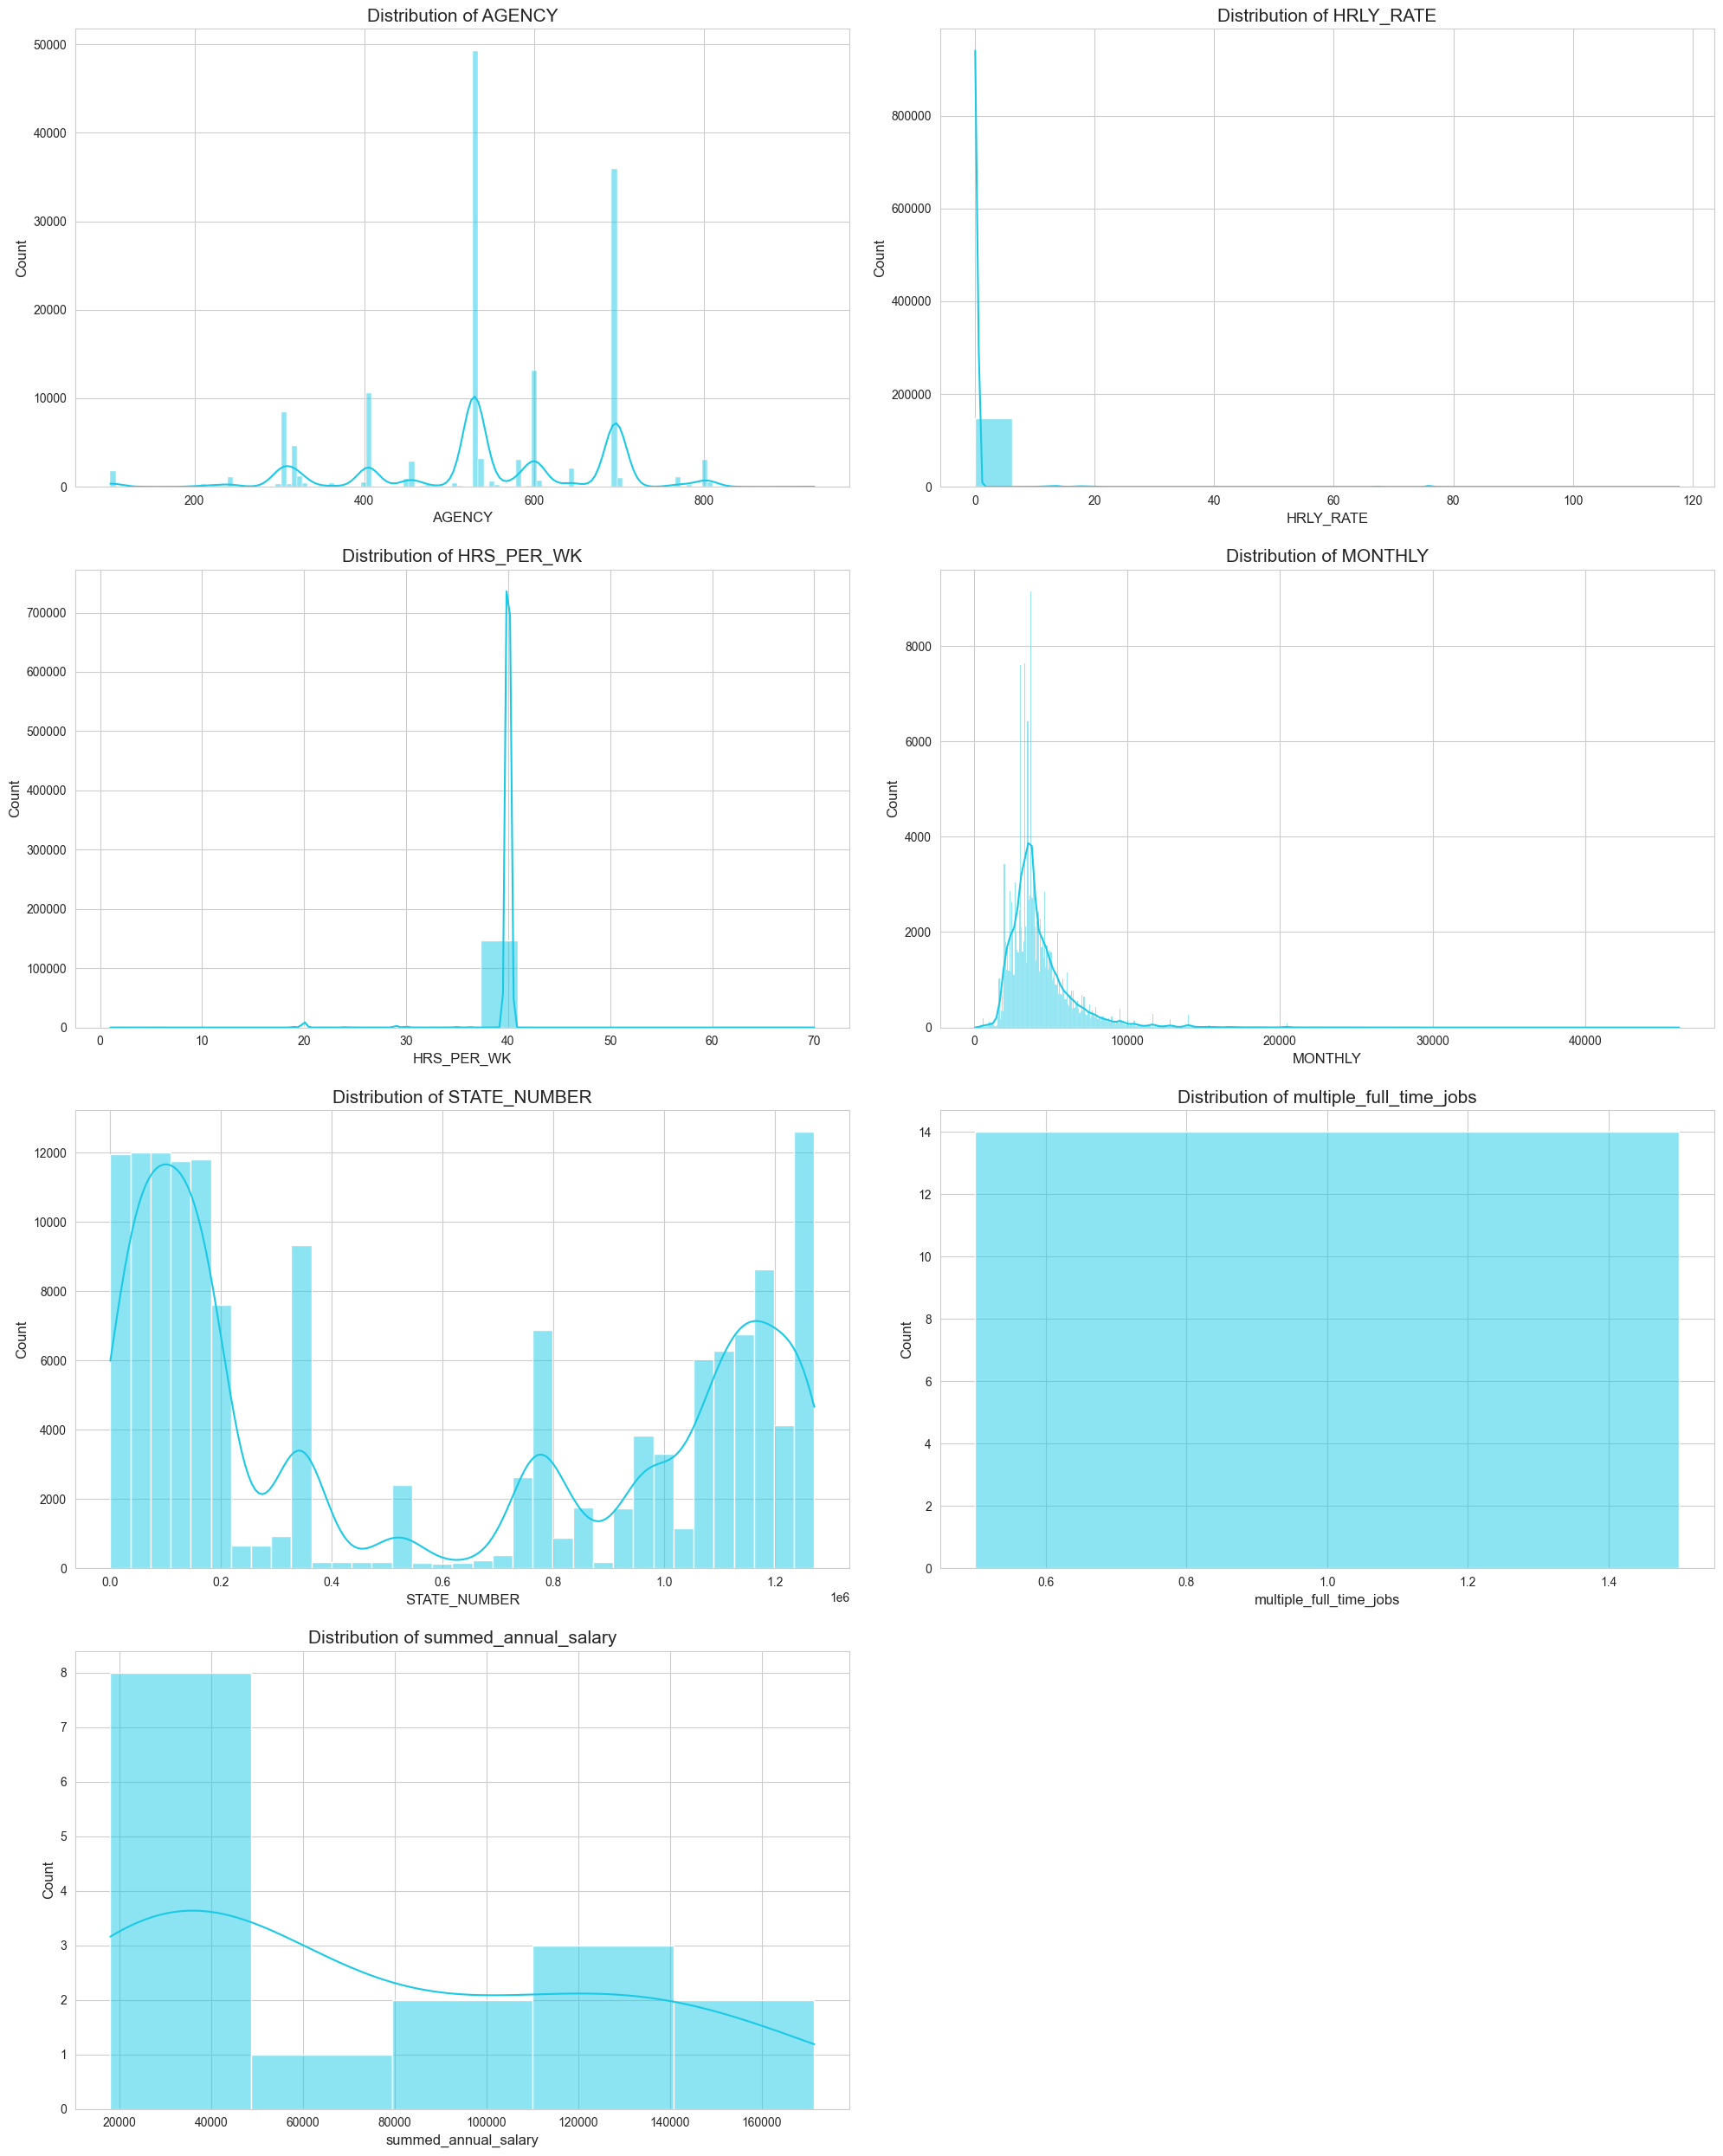

In [20]:
plt.figure(figsize=(20, 25), facecolor='white')
sns.set_style('whitegrid')
plotnumber= 1

for column in continuous_columns:
    if plotnumber < 8:
        ax= plt.subplot(4, 2, plotnumber)
        sns.histplot(data=data, x=column, color='#1AC9E6', kde=True)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.title(f'Distribution of {column}', fontsize=15)
    plotnumber+=1
plt.tight_layout(h_pad=2, w_pad=2)
plt.show()

<h4><b>Insights</b></h4>

<b style="font-size: 14px">Distribution of AGENCY</b>
- <span style="font-size: 14px">The histogram shows that the distribution of employees across agencies is highly skewed, with a few agencies employing a large number of individuals compared to others. This could indicate that certain agencies are much larger or have more roles to fill.</span>

<b style="font-size: 14px">Distribution of HRLY_RATE</b>
- <span style="font-size: 14px">The `hourly rate` distribution is extremely left-skewed, with the majority of employees having a low hourly rate, and very few employees having a high hourly rate. This suggests that high hourly rates are rare and could be associated with specialized positions.</span>

<b style="font-size: 14px">Distribution of HRS_PER_WK</b>
- <span style="font-size: 14px">The `hours per week` histogram is sharply peaked around what appears to be the 40-hour mark, which is typical for full-time employment. There are very few instances of employees working significantly less or more than this standard workweek.</span>

<b style="font-size: 14px">Distribution of MONTHLY</b>
- <span style="font-size: 14px">`Monthly` salary distribution is right-skewed, indicating that most employees earn a lower monthly salary, with a small number of employees earning much higher salaries.</span>

<b style="font-size: 14px">Distribution of STATE_NUMBER</b>
- <span style="font-size: 14px">- The distribution of `STATE_NUMBER` exhibits multiple peaks and lacks uniformity. This pattern suggests that some state numbers are more prevalent, possibly due to the way they are allocated or the criteria used for assignment. The distribution does not clearly indicate whether the data is normally distributed or skewed.</span>



<h4 style="font-size: 14px"><b>Analysis for Categorical Columns</b></h4>

In [21]:
# Among the categorical features, certain sub-categories of features are taken for checking the count such as follows:
# ethnicity, gender, status, duplicated, combined_multiple_jobs, hide_from_search, multiple_full_time_jobs

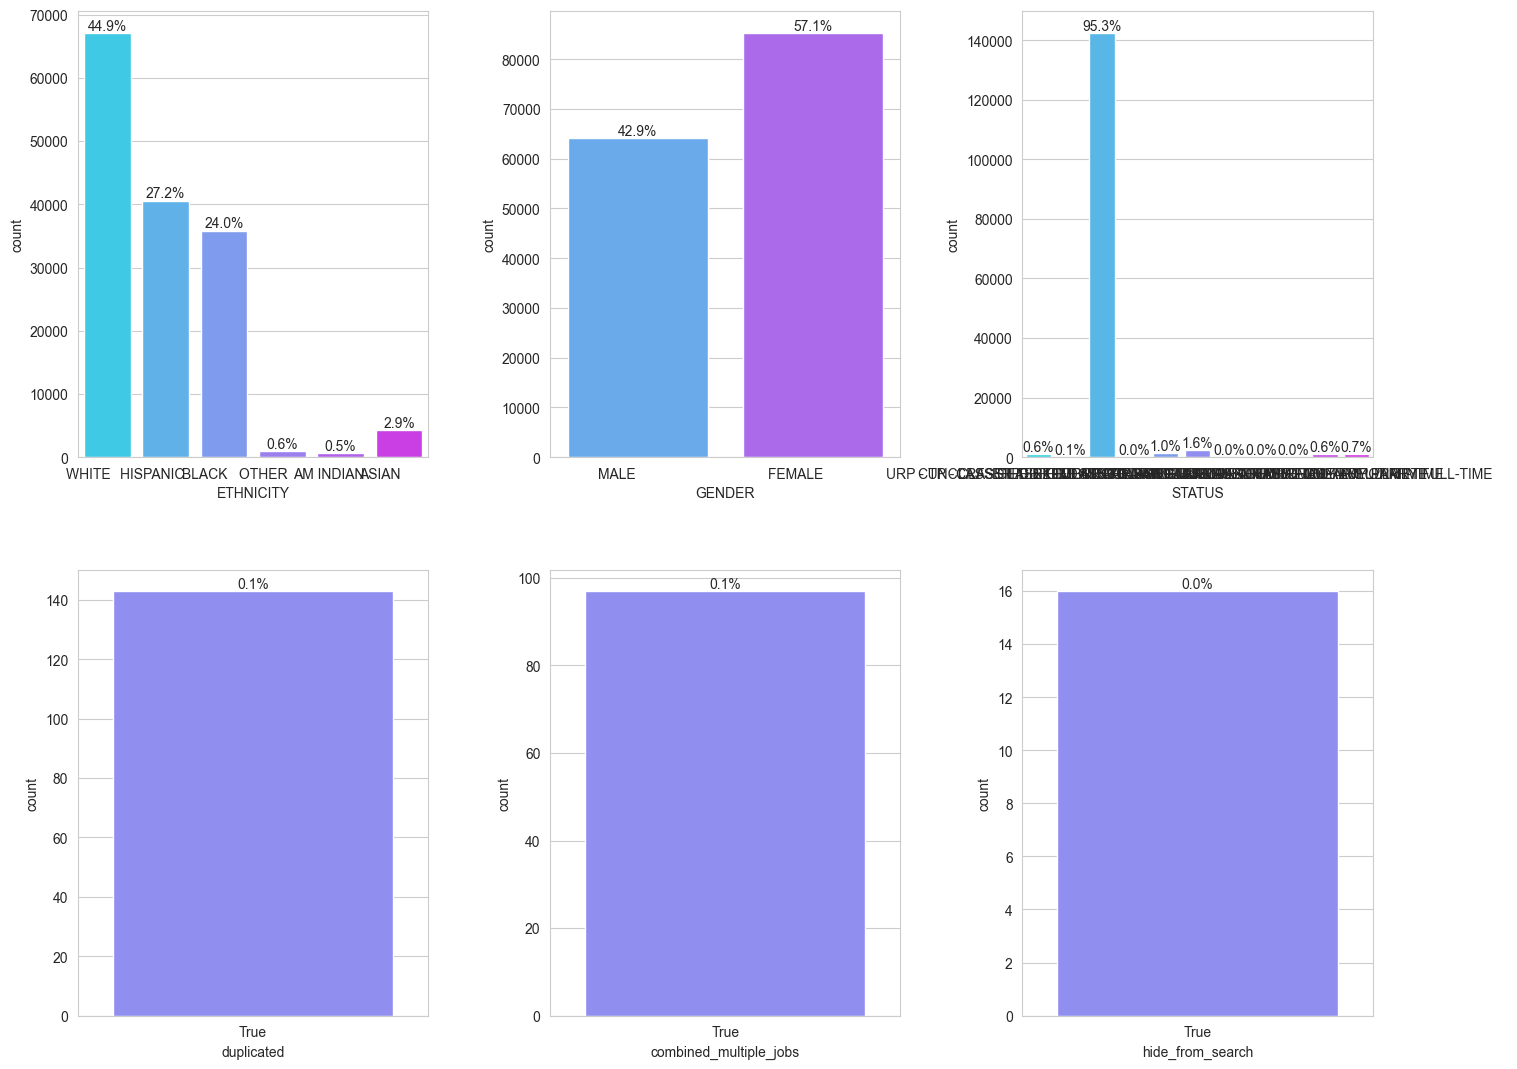

In [22]:
def plot_with_percentages(column_name, data, ax):
    # Create the countplot on the specified Axes object
    sns.countplot(data=data, x=column_name, palette='cool', ax=ax)

    # Calculate the total number of entries in the data to compute percentages
    total = len(data[column_name])

    # Get the current tick locations and labels
    for p in ax.patches:
        # Calculate percentage and format it as text
        percentage = f'{100 * p.get_height() / total:.1f}%'
        # Calculate the x and y coordinates for the text
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        # Add the text to the plot
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

# Filter out the columns you don't want to plot
columns_to_plot = [col for col in categorical_columns if col not in ['AGENCY_NAME', 'LAST_NAME', 'FIRST_NAME', 'MI', 'CLASS_CODE', 'CLASS_TITLE', 'EMPLOY_DATE']]

# Determine the size of the grid
n = len(columns_to_plot)
ncols = 3
nrows = n // ncols + (n % ncols > 0)

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*6))
fig.tight_layout(pad=6.0)

# Flatten the axes array for easy iteration if it's 2D
if nrows > 1:
    axes = axes.flatten()
else:
    axes = [axes]

# Plot each column on its subplot
for i, column in enumerate(columns_to_plot):
    plot_with_percentages(column, data, axes[i])

# Hide any unused subplots
for j in range(i+1, nrows*ncols):
    fig.delaxes(axes[j])

plt.show()

<h4><b>Insights</b></h4>

<b style="font-size: 14px">Distribution of ETHNICITY</b>
- <span style="font-size: 14px">The majority of the dataset's individuals are identified as White (44.9%), followed by Hispanic (27.2%) and Black (24.0%). Other ethnicities such as Other, American Indian (AM INDIAN), and Asian (INDIAN) are represented in much smaller proportions, 2.9%, 0.5%, and 0.6% respectively. This distribution reflects the ethnic composition of the workforce within the Texas state government as captured in the dataset.</span>

<b style="font-size: 14px">Distribution of GENDER</b>
- <span style="font-size: 14px">Females constitute the majority of the dataset at 57.1%, while males represent 42.9%. This indicates a higher representation of females in the workforce within the dataset.</span>

<b style="font-size: 14px">Distribution of STATUS</b>
- <span style="font-size: 14px">A vast majority of the workforce is classified as CRF - CLASSIFIED REGULAR FULL-TIME (95.3%), indicating that most employees hold stable, full-time positions. Other employment statuses such as URP, CURP, CRP, and others are represented in very small percentages, each constituting less than 1% of the dataset.</span>

<b style="font-size: 14px">Distribution of duplicated</b>
- <span style="font-size: 14px">The bar chart for the `duplicated` variable shows that duplicates are almost non-existent in the dataset, with only 0.1% of the entries marked as true duplicates. This suggests that the dataset has been well-curated to avoid redundancy.</span>

<b style="font-size: 14px">Distribution of combined_multiple_jobs</b>
- <span style="font-size: 14px">Similar to the `duplicated` variable, the `combined_multiple_jobs` variable also shows a negligible presence in the dataset, with only 0.1% of the entries having combined multiple jobs. This indicates that it is rare for individuals in the dataset to have their job records combined.</span>

<b style="font-size: 14px">Distribution of hide_from_search</b>
- <span style="font-size: 14px">The `hide_from_search` variable indicates whether certain records are hidden from search within the organization. The bar chart shows that this is an extremely rare occurrence, with 0.0% of the entries marked as true, suggesting that almost all records are available for search and not hidden.</span>



<h4 style="font-size: 14px"><b>Analysis for Continuous Columns</b></h4>

In [23]:
continuous_columns

['AGENCY',
 'HRLY_RATE',
 'HRS_PER_WK',
 'MONTHLY',
 'STATE_NUMBER',
 'multiple_full_time_jobs',
 'summed_annual_salary']

In [24]:
continuous_columns_data = data[['AGENCY',
 'HRLY_RATE',
 'HRS_PER_WK',
 'MONTHLY',
 'STATE_NUMBER',
 'multiple_full_time_jobs',
 'summed_annual_salary']]

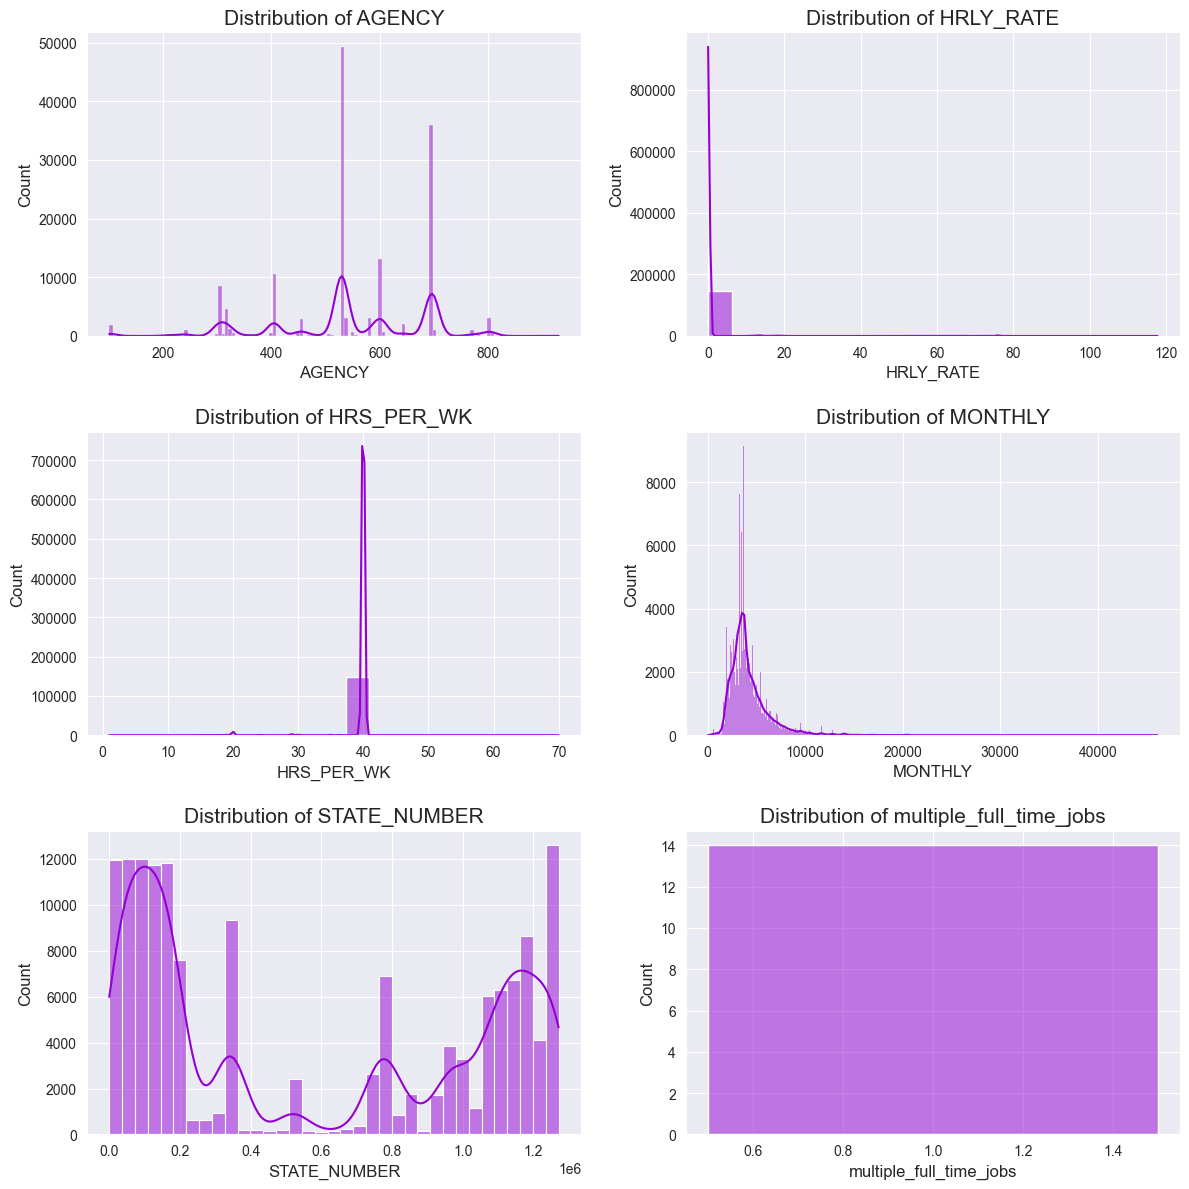

In [25]:
# histplot to analyse the continuous independent features
plt.figure(figsize= (12, 12))

sns.set_style('darkgrid')
plotnumber= 1

for column in continuous_columns_data:
    if plotnumber <=6:
        ax= plt.subplot(3, 2, plotnumber)
        sns.histplot(x=continuous_columns_data[column], color='darkviolet', kde= True)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Count', fontsize= 12)
        plt.title(f'Distribution of {column}', fontsize= 15)
    plotnumber+=1
plt.tight_layout(h_pad=2, w_pad=2)
plt.show()

<h4><b>Insights</b></h4>

<b style="font-size: 14px">Distribution of AGENCY</b>
- <span style="font-size: 14px">The histogram for the `AGENCY` variable shows a multimodal distribution with several peaks, indicating that certain agencies have a higher number of employees than others. This suggests that the workforce is not evenly distributed across all agencies.</span>

<b style="font-size: 14px">Distribution of HRLY_RATE</b>
- <span style="font-size: 14px">The `HRLY_RATE` histogram is highly left-skewed, with a large concentration of values near the lower end of the hourly rate spectrum and very few instances of high hourly rates. This indicates that most employees are likely to be salaried or have lower hourly rates, with high hourly rates being uncommon.</span>

<b style="font-size: 14px">Distribution of HRS_PER_WK</b>
- <span style="font-size: 14px">The `HRS_PER_WK` (hours per week) histogram shows a sharp peak around the 40-hour mark, which is typical for full-time employment. The distribution is very steep, suggesting that the vast majority of employees work a standard full-time schedule, with very few part-time or overtime exceptions.</span>

<b style="font-size: 14px">Distribution of MONTHLY</b>
- <span style="font-size: 14px">The `MONTHLY` salary distribution is right-skewed, with most of the data concentrated at the lower end of the salary range and a tail extending towards higher salaries. This pattern indicates that while most employees earn a lower monthly salary, there are a few employees with significantly higher earnings.</span>

<b style="font-size: 14px">Distribution of STATE_NUMBER</b>
- <span style="font-size: 14px">The `STATE_NUMBER` histogram displays a complex, multimodal distribution with several peaks and troughs. This could reflect the way state numbers are assigned to employees or agencies, with certain ranges being more commonly used than others.</span>

<b style="font-size: 14px">Distribution of multiple_full_time_jobs</b>
- <span style="font-size: 14px">The histogram for `multiple_full_time_jobs` is not very informative due to the lack of variability in the data. Almost all values are concentrated at a single point, suggesting that very few employees hold multiple full-time jobs within the dataset.</span>



<h4><b>Bivariate Analysis</b></h4>

In [26]:
continuous_columns

['AGENCY',
 'HRLY_RATE',
 'HRS_PER_WK',
 'MONTHLY',
 'STATE_NUMBER',
 'multiple_full_time_jobs',
 'summed_annual_salary']

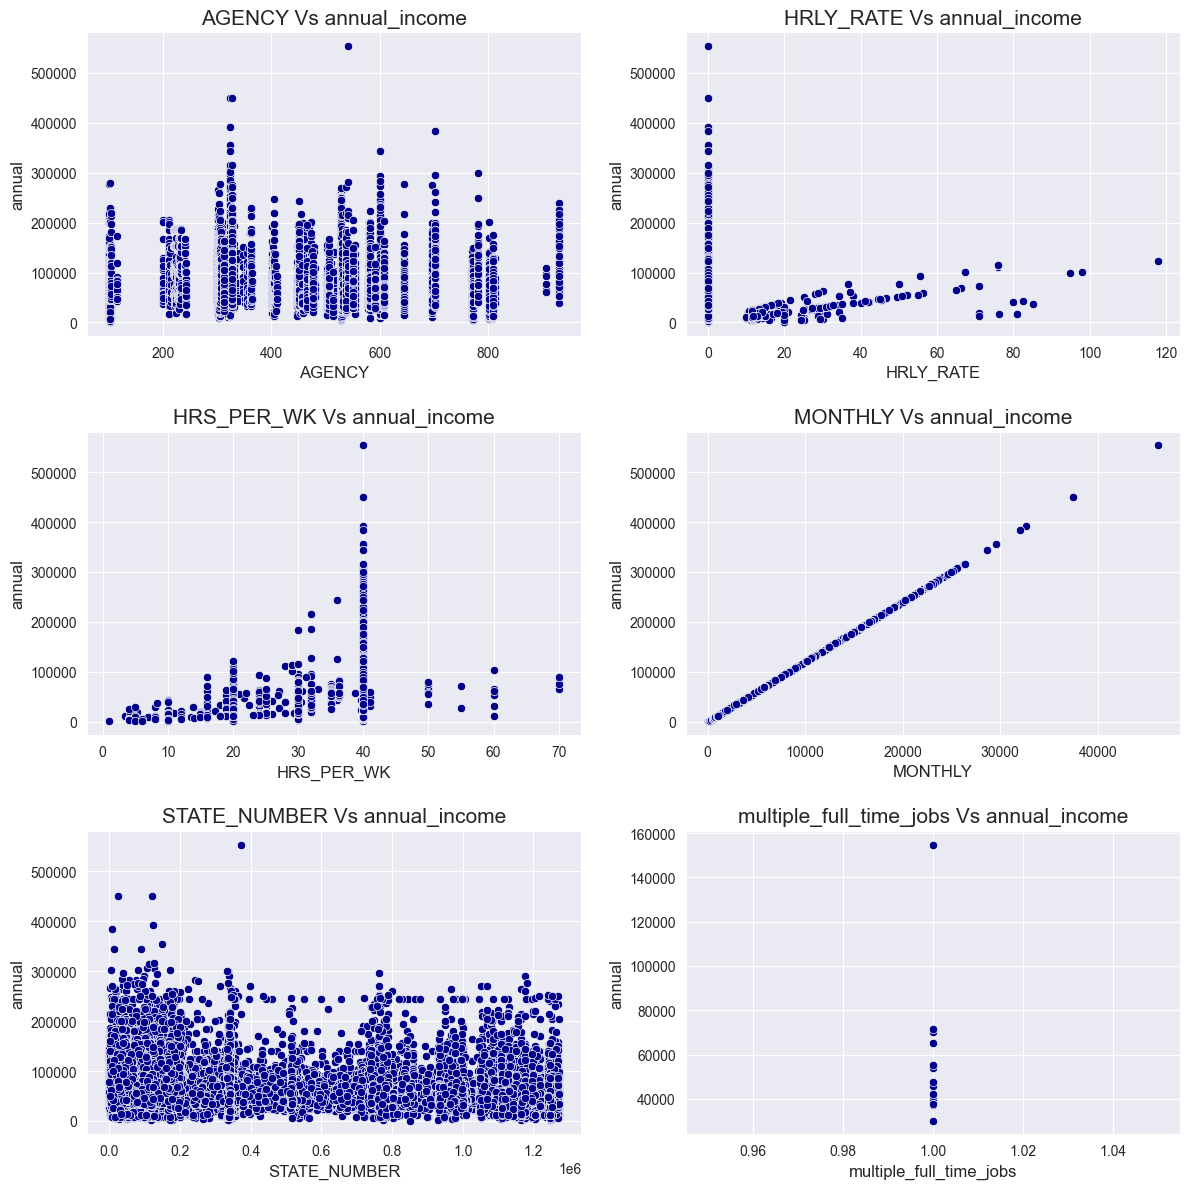

In [27]:
# scatter plots and line plots are plotted to visualize the relationship between the
# continuous input features and the target variable

plt.figure(figsize=(12, 12))
sns.set_style('darkgrid')
plotnumber= 1

for column in continuous_columns:
    if plotnumber <= 6:
        ax = plt.subplot(3, 2, plotnumber)
        sns.scatterplot(x=continuous_columns_data[column], y= data['ANNUAL'], color= 'darkblue', marker= 'o')
        plt.title(f'{column} Vs annual_income', fontsize= '15')
        plt.xlabel(column, fontsize= 12)
        plt.ylabel('annual', fontsize= 12)
    plotnumber+=1
plt.tight_layout(h_pad= 2, w_pad= 2)
plt.show()

<h4><b>Insights</b></h4>

<b style="font-size: 14px">AGENCY Vs annual_income</b>
- <span style="font-size: 14px">The scatter plot shows a wide distribution of annual incomes across different agencies. There is no clear trend or pattern that suggests a relationship between agency number and annual income, indicating that salary may not be strongly dependent on the agency number alone.</span>

<b style="font-size: 14px">HRLY_RATE Vs annual_income</b>
- <span style="font-size: 14px">This plot shows a concentration of data points at the lower end of the hourly rate spectrum, with annual income also being lower. There are a few outliers with higher hourly rates and correspondingly higher annual incomes. The plot suggests that while there may be some relationship between hourly rate and annual income, it is not a direct or strong correlation, possibly due to the presence of salaried employees whose income does not directly scale with hourly rate.</span>

<b style="font-size: 14px">HRS_PER_WK Vs annual_income</b>
- <span style="font-size: 14px">The plot indicates that most employees work around 40 hours per week, with varying annual incomes. There is no clear trend that higher hours per week correlate with higher annual income, which could be due to the standardization of full-time work hours and the fact that annual income is influenced by other factors such as job role and seniority, not just hours worked.</span>

<b style="font-size: 14px">MONTHLY Vs annual_income</b>
- <span style="font-size: 14px">There is a clear positive correlation between monthly income and annual income, as expected since annual income is a multiple of monthly income. The data points form a linear pattern, indicating that as monthly income increases, annual income also increases proportionally.</span>

<b style="font-size: 14px">STATE_NUMBER Vs annual_income</b>
- <span style="font-size: 14px">The scatter plot does not show any discernible pattern or trend between state number and annual income. The distribution of annual income across state numbers is fairly uniform, suggesting that state number is not a determinant of annual income.</span>

<b style="font-size: 14px">multiple_full_time_jobs Vs annual_income</b>
- <span style="font-size: 14px">This plot shows that almost all data points are concentrated at a single value for multiple_full_time_jobs, indicating that almost no employees in the dataset have multiple full-time jobs. There is no variation in the multiple_full_time_jobs variable, so no relationship can be inferred with annual income.</span>


In [28]:
categorical_columns

['AGENCY_NAME',
 'LAST_NAME',
 'FIRST_NAME',
 'MI',
 'CLASS_CODE',
 'CLASS_TITLE',
 'ETHNICITY',
 'GENDER',
 'STATUS',
 'EMPLOY_DATE',
 'duplicated',
 'combined_multiple_jobs',
 'hide_from_search']

<h4><b>Multivariate Analysis</b></h4>

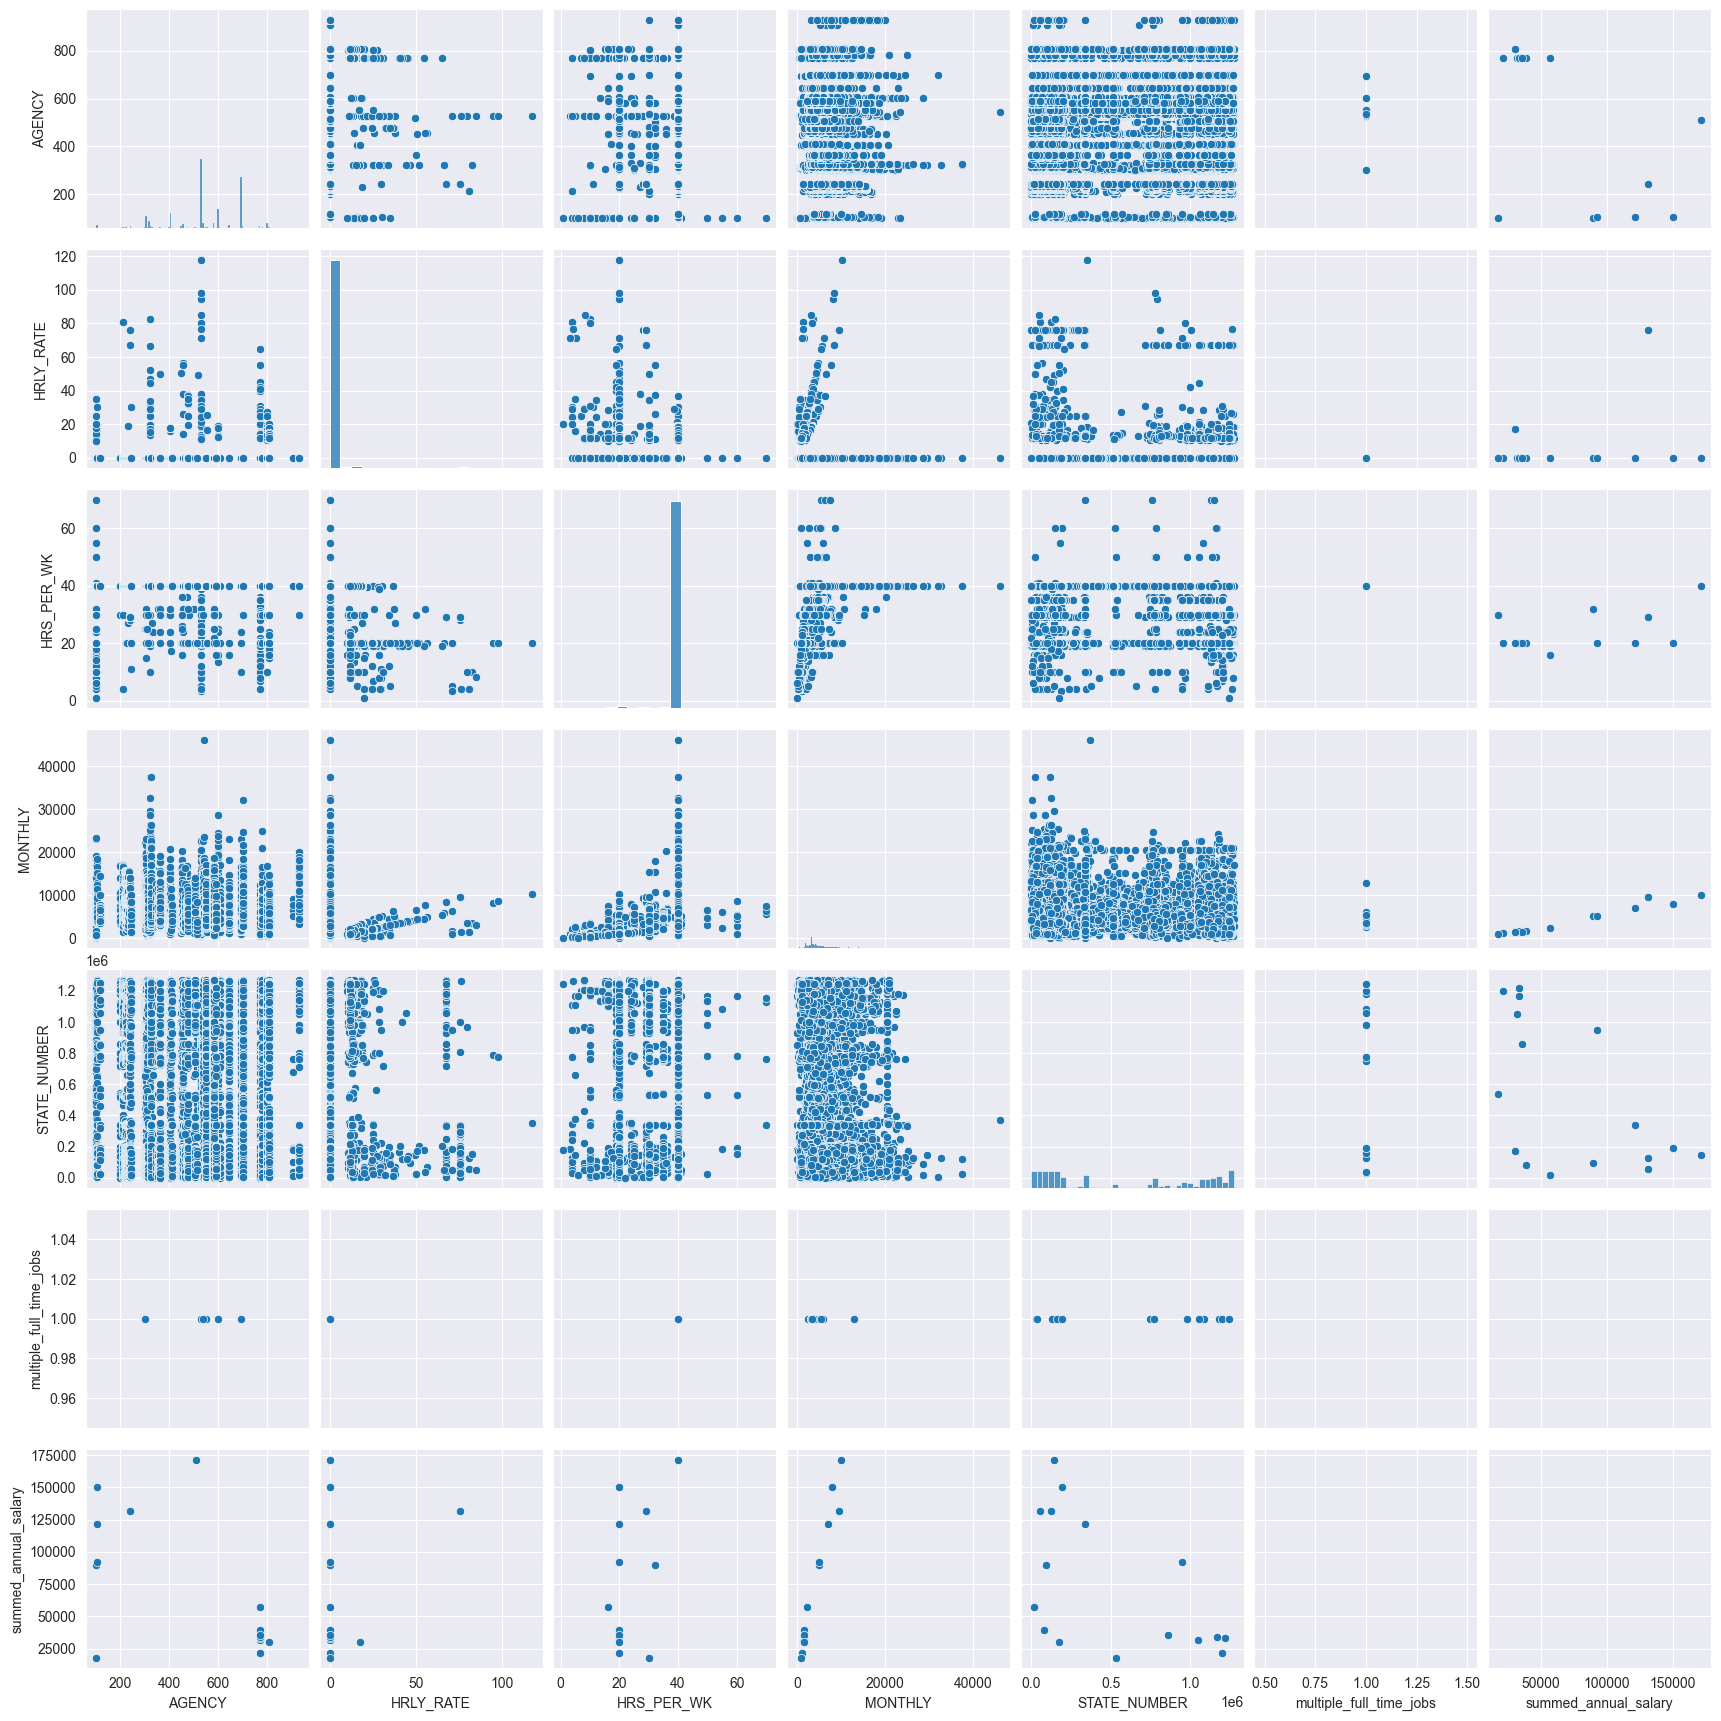

In [29]:
sns.pairplot(data= data.loc[:, continuous_columns])
plt.show()

<h4 style="font-size: 14px"><b>Insights</b></h4>

- <span style="font-size: 14px">`AGENCY`: The distribution is multimodal, indicating that some agencies have more employees than others.</span>

- <span style="font-size: 14px">`HRLY_RATE`: The histogram is left-skewed, suggesting that most employees have lower hourly rates.</span>

- <span style="font-size: 14px">`HRS_PER_WK`: There is a sharp peak around 40 hours, which is typical for full-time work.</span>

- <span style="font-size: 14px">`MONTHLY`: The distribution is right-skewed, with most employees earning lower monthly salaries.</span>

- <span style="font-size: 14px">`STATE_NUMBER`: The distribution is multimodal, with certain state numbers being more common.</span>

- <span style="font-size: 14px">`multiple_full_time_jobs`: Almost all values are concentrated at one point, indicating this is a rare occurrence.</span>

- <span style="font-size: 14px">`summed_annual_salary`: The histogram shows a right-skewed distribution, with most employees having lower annual salaries.</span>

- <span style="font-size: 14px">`AGENCY` vs. `HRLY_RATE`, `HRS_PER_WK`, `MONTHLY`: There is no clear pattern, suggesting that these variables do not have a strong linear relationship with the agency number.</span>

- <span style="font-size: 14px">`HRLY_RATE` vs. `MONTHLY`, `summed_annual_salary`: There appears to be a positive relationship, as expected, since higher hourly rates would generally lead to higher salaries.</span>

- <span style="font-size: 14px">`HRS_PER_WK` vs. `MONTHLY`, `summed_annual_salary`: The scatter plots show a cluster of points around 40 hours per week, but the relationship with salary is not clear-cut, indicating that hours worked per week may not be the sole determinant of salary.</span>

- <span style="font-size: 14px">`MONTHLY` vs. `summed_annual_salary`: There is a clear linear relationship, as monthly salary is a direct contributor to annual salary.</span>

- <span style="font-size: 14px">`STATE_NUMBER` vs. other variables: There is no discernible pattern, suggesting that the state number is not strongly related to salary or hourly rates.</span>

- <span style="font-size: 14px">Overall, the pair plot indicates that while some variables have expected relationships (like `MONTHLY` vs. `summed_annual_salary`), others do not show a clear linear relationship, suggesting that factors determining salary and hourly rates are complex and multifaceted.</span>



<h4><b>Data Preprocessing</b></h4>

<h4 style="font-size: 14px"><b>Check for if there are any Null values</b></h4>

In [30]:
data.isnull().sum()

AGENCY                          0
AGENCY_NAME                     0
LAST_NAME                       0
FIRST_NAME                      0
MI                              0
CLASS_CODE                      0
CLASS_TITLE                     0
ETHNICITY                       0
GENDER                          0
STATUS                          0
EMPLOY_DATE                     0
HRLY_RATE                       0
HRS_PER_WK                      0
MONTHLY                         0
ANNUAL                          0
STATE_NUMBER                    0
duplicated                 149338
multiple_full_time_jobs    149467
combined_multiple_jobs     149384
summed_annual_salary       149465
hide_from_search           149465
dtype: int64

<h4 style="font-size: 14px"><b>Insights</b></h4>

- <span style="font-size: 14px">There are null values in the dataset for the `multiple_full_time_jobs`, `combined_multiple_jobs`, `summed_annual_salary`, and `hide_from_search` columns.</span>

- <span style="font-size: 14px">The `multiple_full_time_jobs` column has a large number of null values.</span>

- <span style="font-size: 14px">Than the above mentioned columns the other columns doesn't have any null values.</span>


In [33]:
# droping the last 5 columns as they have large number of null values
# and they are not relevant for the dataset
# data = data.drop(['duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs', 'summed_annual_salary', 'hide_from_search'])
data.head(5)

,AGENCY,AGENCY_NAME,LAST_NAME,FIRST_NAME,MI,CLASS_CODE,CLASS_TITLE,ETHNICITY,GENDER,STATUS,EMPLOY_DATE,HRLY_RATE,HRS_PER_WK,MONTHLY,ANNUAL,STATE_NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN
